### Introduction to Computer Vision (Fall 2020)
Instructor: Mohammad Fahim \\
TA: Riby A. B., Rufina Galieva


### Acknowledgement
This lab was maintained by Marcus, Rufina, Alex and Fahim \\

This lab was created by: Rauf \\
Email: goodraff@gmail.com \\
Links: [github](https://github.com/RocketFlash) , [LinkedIn](https://www.linkedin.com/in/rocketflash/)


### Lab Objectives

Logical operations

Histograms

Thresholding

Morphological operations

Gradients

Edge detection

Contours

## Import libraries, download images

In [1]:
# All plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# Set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# Remove grid lines
import numpy as np
import time
import cv2

In [2]:
!wget "https://images.unsplash.com/photo-1578133630261-a79a92922335?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80" -O cat.jpg
!wget "https://images.unsplash.com/photo-1514924013411-cbf25faa35bb?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80" -O city.jpg
!wget "https://drive.google.com/uc?export=view&id=121kl8unhgoIsgamR0QXU57l7Eb7A74nb" -O check.jpg
!wget "https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2019/08/14/Pictures/_2466e14a-be6d-11e9-a504-fd2d583231d6.JPG" -O hollywood.jpg
!wget "https://cs8.pikabu.ru/post_img/big/2016/09/14/10/1473874349129513157.jpg" -O earth.jpg

clear_output()

## Helper functions

In [3]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

  
# function to add noise on image 
# code taken from (https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv)
def noisy(image, amount = 0.04, s_vs_p = 0.5):
    row,col = image.shape
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
    out[coords] = 1
    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
    out[coords] = 0
    return out

# plot rgb image histogram
def plot_image_histogram(image, v_range= [0,256]):
    plt.subplot(1,2,1)
    if len(image.shape) == 3:
      colors = ('r','g','b')
      plt.imshow(image)
    else:
      colors = ('b')
      plt.imshow(image, 'gray')
      
    plt.title('image')

    plt.subplot(1,2,2)
    plt.title('histogram')
    for i, col in enumerate(colors):
        histr = cv2.calcHist([image],[i],None,[256],v_range)
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()
    
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

## Checkout downloaded images

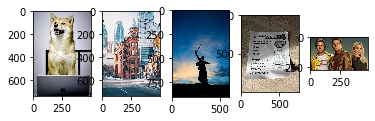

In [4]:
cat, city, earth, check = read_and_resize('cat.jpg')[:744, :], read_and_resize('city.jpg'), read_and_resize('earth.jpg'), read_and_resize('check.jpg')
hollywood = read_and_resize('hollywood.jpg')
showInRow([cat, city, earth, check, hollywood])

## Logical operations

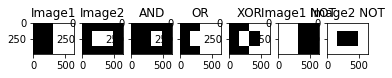

In [5]:
# create two black images
h, w, c = 480, 640, 1 # height, width and channels
img1 = np.zeros((h, w), np.uint8)
img2 = np.zeros((h, w), np.uint8)
img1[int(0):int(h),int(w/2):int(w)] = 255
img2[int(h/4):int(3*h/4),int(w/4):int(3*w/4)] = 255

# different logical operations
bit_and = cv2.bitwise_and(img2, img1)
bit_or = cv2.bitwise_or(img2, img1)
bit_xor = cv2.bitwise_xor(img1, img2)
bit_not = cv2.bitwise_not(img1)
bit_not2 = cv2.bitwise_not(img2)


titles = ['Image1','Image2','AND','OR','XOR','Image1 NOT','Image2 NOT']
images = [img1, img2, bit_and, bit_or, bit_xor, bit_not, bit_not2]
 
showInRow(images, titles)

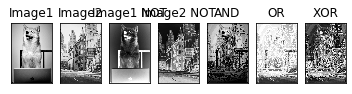

In [6]:
cat_gray = cv2.cvtColor(cat, cv2.COLOR_RGB2GRAY)
city_gray = cv2.cvtColor(city, cv2.COLOR_RGB2GRAY)

#image grayscale value is converted in binary and then the bitwise logical operation is done to obtain the final results
bit_and = cv2.bitwise_and(cat_gray, city_gray)
bit_or = cv2.bitwise_or(cat_gray, city_gray)
bit_xor = cv2.bitwise_xor(cat_gray, city_gray)
bit_not = cv2.bitwise_not(cat_gray)
bit_not2 = cv2.bitwise_not(city_gray)


titles = ['Image1','Image2','Image1 NOT','Image2 NOT','AND','OR','XOR']
images = [cat_gray, city_gray, bit_not, bit_not2, bit_and, bit_or, bit_xor]
 
showInRow(images, titles, disable_ticks = True)

## Histograms

##  Histogram in OpenCV

Histogram type is: <class 'numpy.ndarray'>
Histogram shape is: (256, 1)


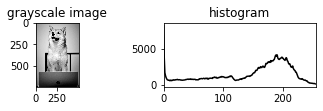

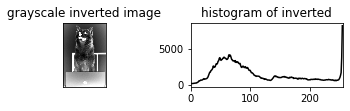

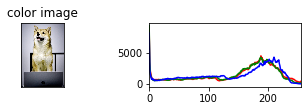

In [7]:
# plot image
plt.subplot(3,2,1)
plt.imshow(cat_gray, cmap = 'gray')
plt.title('grayscale image')

# calculate histogram
#format is cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist = cv2.calcHist([cat_gray],[0],None,[256],[0,256])
print('Histogram type is: {}'.format(type(hist)))
print('Histogram shape is: {}'.format(hist.shape))

# plot histogram
plt.subplot(3,2,2)
plt.plot(hist,color = 'black')
plt.title('histogram')
plt.xlim([0,256])
plt.show()

# plot inversed histogram
cat_gray_inv = cv2.bitwise_not(cat_gray)
hist_inv = cv2.calcHist([cat_gray_inv],[0],None,[256],[0,256])
plt.subplot(3,2,3)
plt.imshow(cat_gray_inv, cmap = 'gray')
plt.title('grayscale inverted image')
plt.xticks([]),plt.yticks([])

plt.subplot(3,2,4)
plt.plot(hist_inv,color = 'black')
plt.title('histogram of inverted')
plt.xlim([0,256])
plt.show()


plt.subplot(3,2,5)
plt.imshow(cat)
plt.title('color image')
plt.xticks([]),plt.yticks([])

plt.subplot(3,2,6)
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([cat],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## Histogram in Numpy

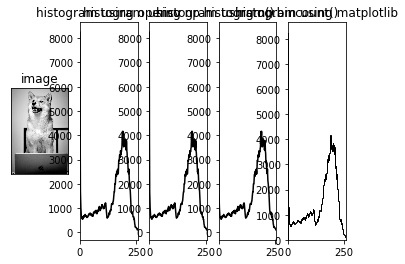

Opencv calcHist() execution time: 0.0011379999999996393
Numpy histogram() execution time: 0.008286000000000016
Numpy bincount() execution time: 0.0013399999999998968


In [8]:
# opencv function
time_start = time.clock()
hist = cv2.calcHist([cat_gray],[0],None,[256],[0,256])
time_opencv = (time.clock() - time_start)
# numpy functions
time_start = time.clock()
hist1,bins = np.histogram(cat_gray.ravel(),256,[0,256])
time_numpy1 = (time.clock() - time_start)
time_start = time.clock()
hist2 = np.bincount(cat_gray.ravel(),minlength=256)
time_numpy2 = (time.clock() - time_start)

plt.subplot(1,5,1), plt.imshow(cat_gray, cmap = 'gray')
plt.xticks([]),plt.yticks([])
plt.title('image')
plt.subplot(1,5,2), plt.plot(hist, color = 'black')
plt.title('histogram using opencv'), plt.xlim([0,256])
plt.subplot(1,5,3), plt.plot(hist1, color = 'black')
plt.title('histogram using np.histogram()'), plt.xlim([0,256])
plt.subplot(1,5,4), plt.plot(hist2, color = 'black')
plt.title('histogram using np.bincount()'), plt.xlim([0,256])
plt.subplot(1,5,5), plt.hist(cat_gray.ravel(),256,[0,256],histtype='step',color='black');
plt.title('histogram using matplotlib'), plt.xlim([0,256])
plt.show()

print('Opencv calcHist() execution time: {}'.format(time_opencv))
print('Numpy histogram() execution time: {}'.format(time_numpy1))
print('Numpy bincount() execution time: {}'.format(time_numpy2))

## Applying Mask

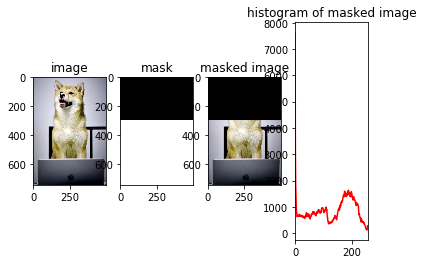

In [9]:
# create a mask
mask = np.zeros(cat.shape[:2], np.uint8)
mask[300:,:cat.shape[1]] = 255
masked_img = cv2.bitwise_and(cat,cat,mask = mask)

# calculate histogram with mask and without mask
# check third argument for mask
hist_full = cv2.calcHist([cat],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([cat],[0],mask,[256],[0,256])

plt.subplot(1,4,1), plt.title('image'), plt.imshow(cat)
plt.subplot(1,4,2), plt.title('mask'), plt.imshow(mask,'gray')
plt.subplot(1,4,3), plt.title('masked image'), plt.imshow(masked_img, 'gray')
plt.subplot(1,4,4), plt.title('histogram of masked image'), plt.plot(hist_mask, color = 'r')
plt.xlim([0,256])
plt.show()

## Thresholding

Threshold types:

- Binary  
$dst(x,y) = \begin{cases} 
   max\_value & \text{if } src(x,y) > threshold \\
   0       & otherwise
  \end{cases}$
  
- Binary inverted  
$dst(x,y) = \begin{cases} 
   0 & \text{if } src(x,y) > threshold \\
   max\_value       & otherwise
  \end{cases}$

- Truncate  
$dst(x,y) = \begin{cases} 
   threshold & \text{if } src(x,y) > threshold \\
   src(x,y)       & otherwise
  \end{cases}$

- Threshold to zero  
$dst(x,y) = \begin{cases} 
   src(x,y) & \text{if } src(x,y) > threshold \\
   0       & otherwise
  \end{cases}$
  
- Threshold to zero  inverted  
$dst(x,y) = \begin{cases} 
   0 & \text{if } src(x,y) > threshold \\
   src(x,y)       & otherwise
  \end{cases}$
  
  <img src='https://docs.opencv.org/2.4/_images/threshold.png'>

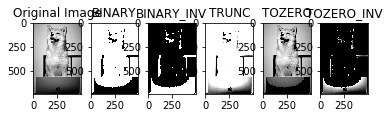

In [10]:
#@title Threshold { run: "auto" }
thresh_val = 70 #@param {type:"slider", min:0, max:255, step:1}

ret,thresh1 = cv2.threshold(cat_gray,thresh_val,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(cat_gray,thresh_val,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(cat_gray,thresh_val,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(cat_gray,thresh_val,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(cat_gray,thresh_val,255,cv2.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [cat_gray, thresh1, thresh2, thresh3, thresh4, thresh5]
 
showInRow(images, titles)

## Exercise: Implement your own thresholding functions implementation

In [11]:
# implement your own binary and binary_inv functions
def binary_thresh(image, threshold = 127, max_value=255):
    mask = np.zeros_like(image)
    mask[image > threshold] = max_value
    return mask

def binary_thresh_inv(image, threshold = 127, max_value=255):
    mask = np.ones_like(image)
    mask = mask * max_value
    mask[image > threshold] = 0
    return mask

# implement your own trunc, tozero and tozero_inv
def trunc_thresh(image, threshold = 127):
    mask = image.copy()
    mask[image > threshold] = threshold
    return mask

def tozero_thresh(image, threshold = 127):
    mask = image.copy()
    mask[image <= threshold] = 0
    return mask

def tozero_thresh_inv(image, threshold = 127):
    mask = image.copy()
    mask[image > threshold] = 0
    return mask

## Test your implementations

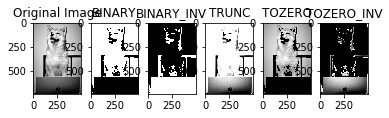

In [12]:
image_binary = binary_thresh(cat_gray)
image_binary_inv = binary_thresh_inv(cat_gray)
image_trunc = trunc_thresh(cat_gray)
image_tozero = tozero_thresh(cat_gray)
image_tozero_inv = tozero_thresh_inv(cat_gray)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [cat_gray, image_binary, image_binary_inv, image_trunc, image_tozero, image_tozero_inv]

showInRow(images, titles)

## Otsu’s Binarization

Given a grayscale image and its histogram: 

<img src="http://www.labbookpages.co.uk/software/imgProc/files/otsuOrig.png">

Otsu's method iterates through all the possible threshold values, i.e. over all values in histogram. 

The goal of Otsu's method is to minimize within-class variance:
 
 $$\sigma _{w}^{2}(t)=\omega _{b}(t)\sigma _{b}^{2}(t)+\omega _{f}(t)\sigma _{f}^{2}(t)$$
 
Where $\omega _{b}(t)$ is a background class weight, $\omega _{f}(t)$ is a foreground class weight for a given threshold $t$ :
 
 $${\displaystyle {\begin{aligned}\omega _{b}(t)&=\sum _{i=0}^{t-1}histogram(i) \;\;\;\;\;\; \omega _{f}(t)=\sum _{i=t}^{L-1}histogram(i)\end{aligned}}}$$
 
 Class means:
 $${\displaystyle {\begin{aligned}\mu _{b}(t)&={\frac {\sum _{i=0}^{t-1}i\cdot histogram(i)}{\omega _{b}(t)}} \;\;\;\;\;\; \mu _{f}(t)&={\frac {\sum _{i=t}^{L-1}i\cdot histogram(i)}{\omega _{f}(t)}}\end{aligned}}}$$
 
 Class variances:
  $${\displaystyle {\begin{aligned}\sigma _{b}(t)&={\frac {\sum _{i=0}^{t-1}(i-\mu _b)^2\cdot histogram(i)}{\omega _{b}(t)}} \;\;\;\;\;\; \sigma _{f}(t)={\frac {\sum _{i=t}^{L-1}(i-\mu _f)^2\cdot histogram(i)}{\omega _{f}(t)}} \end{aligned}}}$$


### Example (t = 2)
**Calculate weight, mean and variance for background**

 $${\displaystyle {\begin{aligned}\omega _{b}(2)&=8+7=15 \;\;\;\;\;\; \mu _b = \frac{0\cdot 8+1\cdot 7}{15}=0.4667 \end{aligned}}}$$ \
 $$ \sigma _b^2=\frac{(0-0.4667)^2\cdot 8 + (1-0.4667)^2\cdot 7}{15}=0.2489$$
 
 **Calculate weight, mean and variance for foreground**
  $${\displaystyle {\begin{aligned}\omega _{f}(2)&=2+6+9+4=21 \;\;\;\;\;\; \mu _f = \frac{2\cdot 2+3\cdot 6+4\cdot 9+5\cdot 4}{21}=3.7143 \end{aligned}}}$$ \
 $$ \sigma _f^2=\frac{(2-3.7143)^2\cdot 2 + (3-3.7143)^2\cdot 6 + (4-3.7143)^2\cdot 9+(5-3.7143)^2\cdot 4}{21} = 0.7755$$
 
 **Within class variance**
  $$ \sigma _W^2= 15\cdot 0.2489 + 21\cdot 0.7755 = 20.019$$
 
 
 
 

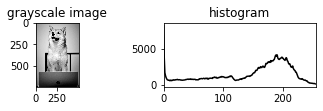

122.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


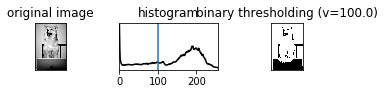

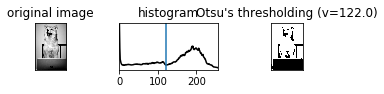

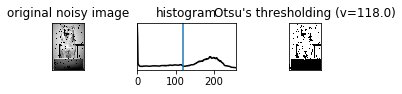

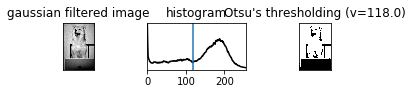

In [13]:
cat_gray = cv2.cvtColor(cat, cv2.COLOR_RGB2GRAY)

# plot image
plt.subplot(3,2,1)
plt.imshow(cat_gray, cmap = 'gray')
plt.title('grayscale image')

# calculate histogram
hist = cv2.calcHist([cat_gray],[0],None,[256],[0,256])

# plot histogram
plt.subplot(3,2,2)
plt.plot(hist,color = 'black')
plt.title('histogram')
plt.xlim([0,256])
plt.show()


img_noisy = noisy(cat_gray, amount = 0.04, s_vs_p = 0.5)

hist_original = cv2.calcHist([cat_gray],[0],None,[256],[0,256])
        
    
# binary thresholding
ret1,th1 = cv2.threshold(cat_gray,100,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(cat_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret2)
 
# Otsu's thresholding before and after Gaussian filtering on noisy image
hist_noisy = cv2.calcHist([img_noisy],[0],None,[256],[0,256])
img_noisy_blur = cv2.GaussianBlur(img_noisy,(7,7),0)
hist_noisy_blur = cv2.calcHist([img_noisy_blur],[0],None,[256],[0,256])

ret3,th3 = cv2.threshold(img_noisy,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret4,th4 = cv2.threshold(img_noisy_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


images = [(cat_gray, th1),
          (cat_gray, th2),
          (img_noisy, th3),
          (img_noisy_blur, th4)]
histograms = [hist_original, hist_original, hist_noisy, hist_noisy_blur]

rets = [ret1, ret2, ret3, ret4]

titles = ['original image','histogram','binary thresholding (v={})'.format(ret1),
           'original image','histogram',"Otsu's thresholding (v={})".format(ret2),
           'original noisy image','histogram',"Otsu's thresholding (v={})".format(ret3),
         'gaussian filtered image','histogram',"Otsu's thresholding (v={})".format(ret4)]


for i in range(4):
  
  plt.subplot(4,3,1)
  plt.imshow(images[i][0],'gray')
  plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
  
  plt.subplot(4,3,2)
  plt.plot(histograms[i],color = 'black')
  plt.axvline(rets[i]), plt.xlim([0,256])
  plt.title(titles[i*3+1])
  plt.yticks([])
  
  plt.subplot(4,3,3)
  plt.imshow(images[i][1], 'gray')
  plt.title(titles[i*3+2])
  plt.xticks([]), plt.yticks([])
  
  plt.show()
  
plt.show()

## Exercise. Implement Otsu's thresholding

[8240. 3770. 1681. 1290. 1010.  830.  691.  644.  608.  639.  565.  553.
  639.  562.  573.  643.  632.  689.  647.  639.  691.  696.  694.  743.
  698.  675.  684.  695.  667.  633.  645.  616.  626.  632.  658.  653.
  665.  714.  709.  741.  752.  776.  733.  766.  754.  804.  733.  766.
  731.  760.  725.  742.  738.  745.  667.  687.  682.  667.  674.  720.
  820.  798.  831.  859.  852.  813.  845.  885.  889.  811.  839.  912.
  887.  820.  896.  768.  870.  870.  915.  906.  890.  907.  864.  984.
 1005.  997. 1072.  998.  968. 1024.  905.  937.  958. 1020. 1003. 1068.
 1056. 1140. 1085. 1130. 1086. 1094. 1032.  993.  986. 1005.  983. 1024.
 1003. 1086. 1092. 1174. 1124. 1219. 1204. 1126.  973.  893.  764.  686.
  621.  589.  610.  649.  646.  643.  649.  714.  765.  757.  819.  737.
  796.  869.  893.  870.  940.  918. 1028. 1084. 1173. 1168. 1184. 1191.
 1200. 1155. 1234. 1287. 1291. 1415. 1539. 1606. 1680. 1671. 1821. 2002.
 1991. 2016. 2192. 2357. 2401. 2309. 2325. 2521. 24

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


threshold = 0


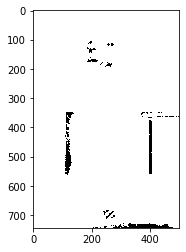

In [14]:
def otsu(gray_img):
  """
  param: gray_img: gray scale image
  return: selected threshold
  """
  # calculate histogram of an image first, use cv2.calcHist
  hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
  hist = hist.flatten()

  print(hist)
  
  scores = []
  # for each value in histogram
  for t in range(len(hist)):
    # calculate weights for background and foreground
    w_b = np.sum(hist[:t])
    w_f = np.sum(hist[t:])
    
    
    # calculate means for each class
    m_b = np.mean(hist[:t])
    m_f = np.mean(hist[t:])

    # calculate class variances
    s_b = np.var(hist[:t])
    s_f = np.var(hist[t:])
    
    scores.append(w_b*s_b + w_f*s_f)
  return np.argmin(scores)


# TEST YOUR IMPLEMENTATION
thresh = otsu(cat_gray)
print(f'threshold = {thresh}')
ret,thresh1 = cv2.threshold(cat_gray,thresh,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = 'gray')
plt.show()

## Adaptive thresholding

*cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])*

- src – Source 8-bit single-channel image.
- maxValue – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
- adaptiveMethod – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- thresholdType – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
- blockSize – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- C – Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

Types of adaptive thresholding:

- cv.ADAPTIVE_THRESH_MEAN_C : The threshold value for each pixel is the mean of neighbourhood area minus C.
- cv.ADAPTIVE_THRESH_GAUSSIAN_C : The threshold value for each pixel is the weighted sum of neighbourhood values where weights are a gaussian window.

Parameters:
- Block Size: decides the size of the neighbourhood area.
- C: just a constant which is subtracted from the calculated (weighted) mean.

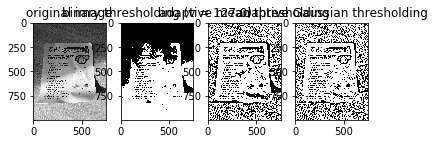

In [15]:
#@title Parameters { run: "auto" }
block_size = 55 #@param {type:"slider", min:1, max:55, step:2}
c_value = 5 #@param {type:"slider", min:-20, max:20, step:1}

check_gray = cv2.cvtColor(check, cv2.COLOR_RGB2GRAY)
ret,th1 = cv2.threshold(check_gray,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(check_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,block_size,c_value)
th3 = cv2.adaptiveThreshold(check_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size,c_value)
 
titles = ['original image', 'binary thresholding (v = {})'.format(ret), 'adaptive mean thresholding', 'adaptive Gaussian thresholding']
images = [check_gray, th1, th2, th3]
showInRow(images, titles)

## Morphological Operations

## Erosion
![Erosion](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/erosion.png)

Erosion of the binary image A by the structuring element B: $$A\ominus B=\bigcap _{{b\in B}}A_{{-b}}$$

## Dilation
![Dilation](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/dilation.png)

Dilation of the binary image A by the structuring element B : $$A  \oplus B = \bigcup_{b\in B} A_b$$

## Opening
![Opening](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/opening.png)

Opening is the erosion followed by dilation of a set A by a structuring element B :  
$${\displaystyle A\circ B=(A\ominus B)\oplus B}$$

## Closing
![Closing](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/closing.png)

Closing is the dilation followed by erosion of a set A by a structuring element B :  $$A\bullet B=(A\oplus B)\ominus B$$

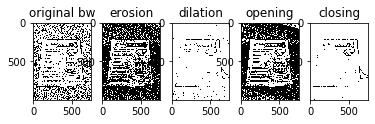

In [16]:
check_gray_inv = check_gray
check_gray_bin = cv2.adaptiveThreshold(check_gray_inv,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,19,5)

# erosion
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(check_gray_bin,kernel,iterations = 1)

#dilation
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(check_gray_bin,kernel,iterations = 1)

# opening
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(check_gray_bin, cv2.MORPH_OPEN, kernel)

# closing
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(check_gray_bin, cv2.MORPH_CLOSE, kernel)

showInRow([check_gray_bin, erosion, dilation, opening, closing], ['original bw', 'erosion', 'dilation', 'opening', 'closing'])

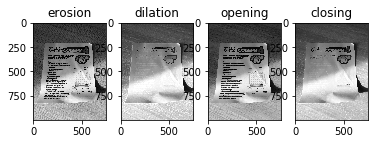

In [17]:
# erosion
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(check_gray,kernel,iterations = 1)

#dilation
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(check_gray,kernel,iterations = 1)

# opening
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(check_gray, cv2.MORPH_OPEN, kernel)

# closing
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(check_gray, cv2.MORPH_CLOSE, kernel)

showInRow([erosion, dilation, opening, closing], ['erosion', 'dilation', 'opening', 'closing'])

## Structuring element

rectangular kernel:
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
elliptical kernel:
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
cross-shaped kernel:
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


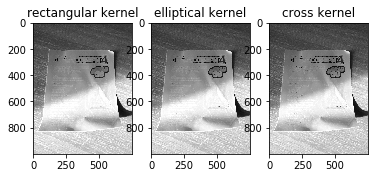

In [18]:
kernel_size = 5
# rectangular kernel
kernel_rectangular = cv2.getStructuringElement(cv2.MORPH_RECT,(kernel_size,kernel_size))
print('rectangular kernel:\n {}'.format(kernel_rectangular))

# elliptical kernel
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernel_size,kernel_size))
print('elliptical kernel:\n {}'.format(kernel_ellipse))

# cross-shaped kernel
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(kernel_size,kernel_size))
print('cross-shaped kernel:\n {}'.format(kernel_cross))


dilation_rectangular = cv2.dilate(check_gray,kernel_rectangular,iterations = 1)
dilation_elliptical = cv2.dilate(check_gray,kernel_ellipse,iterations = 1)
dilation_cross = cv2.dilate(check_gray,kernel_cross, iterations = 1)

titles = ['rectangular kernel', 'elliptical kernel', 'cross kernel']
showInRow([dilation_rectangular, dilation_elliptical, dilation_cross], titles )

## Gradients

### Sobel derivatives

<img src="https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/sobmasks.gif">

**Gradient magnitude**
$$G = \sqrt{G_x^2 + G_y^2}$$

**The gradient's direction**
$$\Theta = atan(\frac{G_y}{G_x})$$

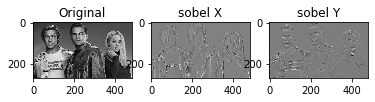

In [19]:
hollywood_gray = cv2.cvtColor(hollywood, cv2.COLOR_RGB2GRAY)

sobelx = cv2.Sobel(hollywood_gray,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(hollywood_gray,cv2.CV_64F,0,1,ksize=3)

showInRow([hollywood_gray, sobelx, sobely], ['Original', 'sobel X', 'sobel Y'])

### Scharr derivatives

<img src="https://i2.wp.com/theailearner.com/wp-content/uploads/2019/05/Scharr2.png?w=625&ssl=1">



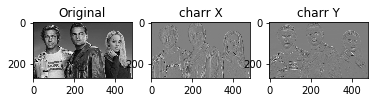

In [20]:
charrx = cv2.Scharr(hollywood_gray,cv2.CV_64F,1,0)
charry = cv2.Scharr(hollywood_gray,cv2.CV_64F,0,1)

showInRow([hollywood_gray, charrx, charry], ['Original', 'charr X', 'charr Y'])

### Laplacian derivative

<img src="https://i.stack.imgur.com/IDWoc.png">


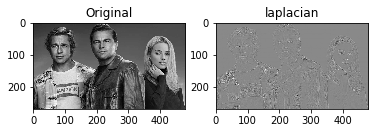

In [21]:
laplacian = cv2.Laplacian(hollywood_gray,cv2.CV_64F)
showInRow([hollywood_gray, laplacian], ['Original', 'laplacian'])

## Edge detection
### Canny edge detector
Algorithm steps:
- Apply Gaussian filter to smooth the image in order to remove the noise
- Find the intensity gradients of the image
- Apply non-maximum suppression to get rid of spurious response to edge detection
- Apply double threshold to determine potential edges
- Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

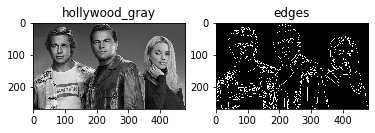

In [22]:
edges = cv2.Canny(hollywood_gray,threshold1=200, threshold2=250)
 
showInRow([hollywood_gray, edges], ['hollywood_gray', 'edges'])

## Exercise: Implement Canny Edge detector

In [ ]:
# source https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

def Canny(image, t, T):
  # convert image to grayscale, if it is not gray
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  
  # find sobelX and sobelY, use cv2.Sobel
  sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
  sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)

  
  # find gradient magnitudes from sobelx and sobely
  G = (sobelx ** 2 + sobely ** 2) ** 0.5
  
  # find gradient directions, use np.arctan2(x1, x2) - will give you arc tangent of x1/x2 
  theta = np.arctan2(sobely, sobelx)
  # we can save computations by using only the half interval of a circle, e.g. [0, pi]
  # instead of [0, 2pi]
  theta[theta < 0] += np.pi

  # non maximum suppression
  G = non_max_suppression(G, theta)
          
  # double threshold
  G = cv2.inRange(G, t, T)
  # disambiguation area trace
  #?
        
  
  
  return G
  

edges = Canny(hollywood_gray, 250, 252)
showInRow([hollywood_gray, edges], ['hollywood_gray', 'edges'])

## Contours

Contours type is: <class 'list'>
Number of contours: 1
Each contour is: <class 'numpy.ndarray'>
Contour array shape is: (144, 1, 2)


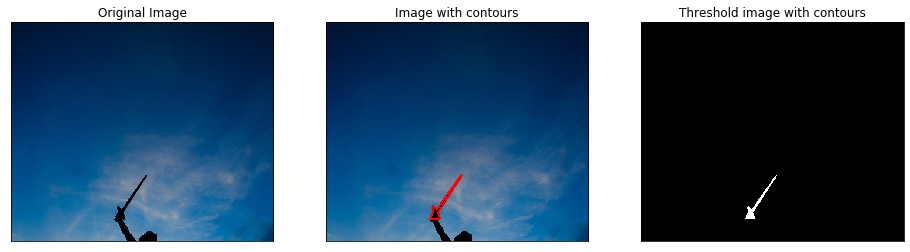

In [42]:
earth = earth[:500]
earth_gray = cv2.cvtColor(earth, cv2.COLOR_RGB2GRAY)
plt.imshow(earth_gray)

earth_gray = 255 - earth_gray
ret, thresh = cv2.threshold(earth_gray, 248, 255, cv2.THRESH_BINARY)

thresh[(thresh.shape[0]-50):,:] = 0
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im2 = cv2.drawContours(thresh, contours, -1, (255, 0, 0))
img_contours=earth.copy()

print('Contours type is: {}'.format(type(contours)))
print('Number of contours: {}'.format(len(contours)))
print('Each contour is: {}'.format(type(contours[0])))
print('Contour array shape is: {}'.format(contours[0].shape))

# draw contours on input image
cv2.drawContours(img_contours, contours, -1, (255,0,0), 3)

plt.subplot(131),plt.imshow(earth,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_contours,cmap = 'gray')
plt.title('Image with contours'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(im2,cmap = 'gray')
plt.title('Threshold image with contours'), plt.xticks([]), plt.yticks([])
 
plt.show()

### Contour features

**Momentum**

(Text(0.5, 1.0, 'Contour center'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

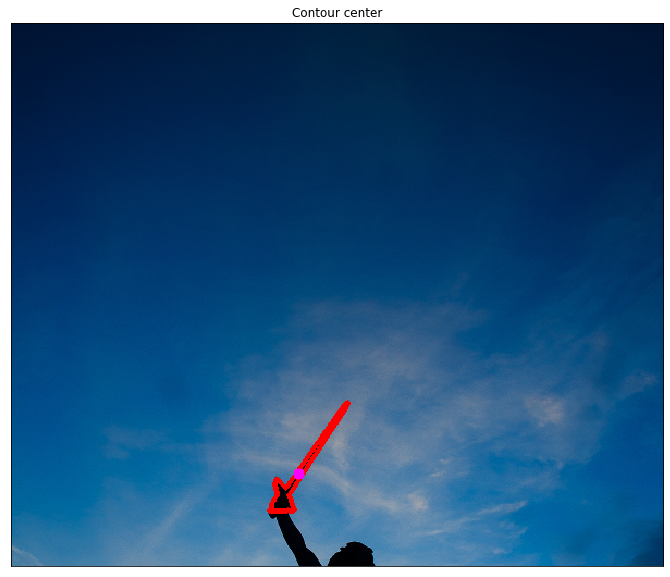

In [43]:
contour = contours[0]
M = cv2.moments(contour)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img_centroid = img_contours.copy()

cv2.circle(img_centroid,(cx,cy), 5, (255,0,255), -1)

plt.imshow(img_centroid)
plt.title('Contour center'), plt.xticks([]), plt.yticks([])

**Contour area**

In [44]:
area = cv2.contourArea(contour)
print('Contour area: {}'.format(area))

Contour area: 788.5


**Contour perimeter**

In [45]:
perimeter = cv2.arcLength(contour,True)
print('Contour perimeter: {}'.format(perimeter))

Contour perimeter: 298.9188268184662


**Contour approximation**

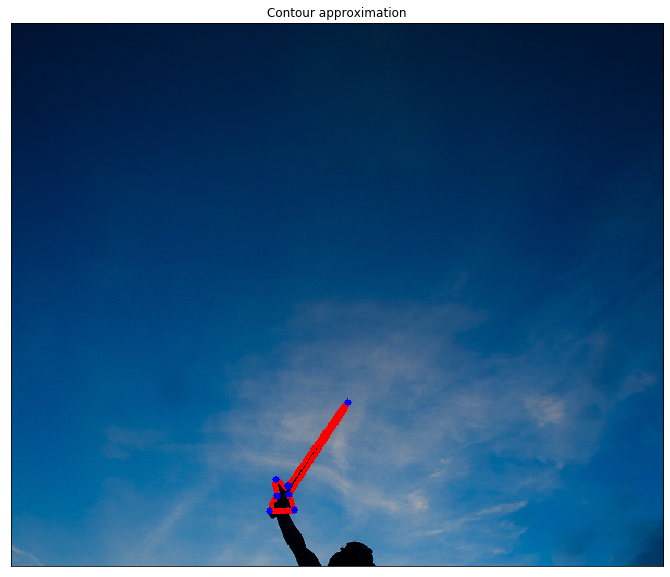

In [46]:
epsilon = 0.01*cv2.arcLength(contour,True)
approx = cv2.approxPolyDP(contour,epsilon,True)

img_approx = img_contours.copy()
cv2.drawContours(img_approx, approx, -1, (0,0,255), 5)
plt.imshow(img_approx)
plt.title('Contour approximation'), plt.xticks([]), plt.yticks([])
plt.show()

**Convex Hull**

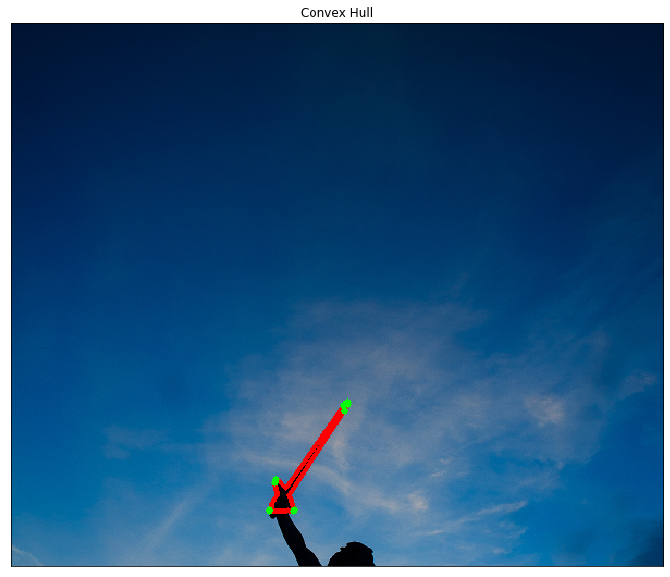

In [47]:
hull = cv2.convexHull(contour)
img_hull = img_contours.copy()

cv2.drawContours(img_hull, hull, -1, (0,255,0), 5)
plt.imshow(img_hull)
plt.title('Convex Hull'), plt.xticks([]), plt.yticks([])
plt.show()

**Check if contour is convex**

In [ ]:
is_convex_contour = cv2.isContourConvex(contour)
is_convex_hull = cv2.isContourConvex(hull)
print('Is our contour convex: {}'.format(is_convex_contour))
print('Is hull convex: {}'.format(is_convex_hull))

Is our contour convex: False
Is hull convex: True


## Bounding shapes

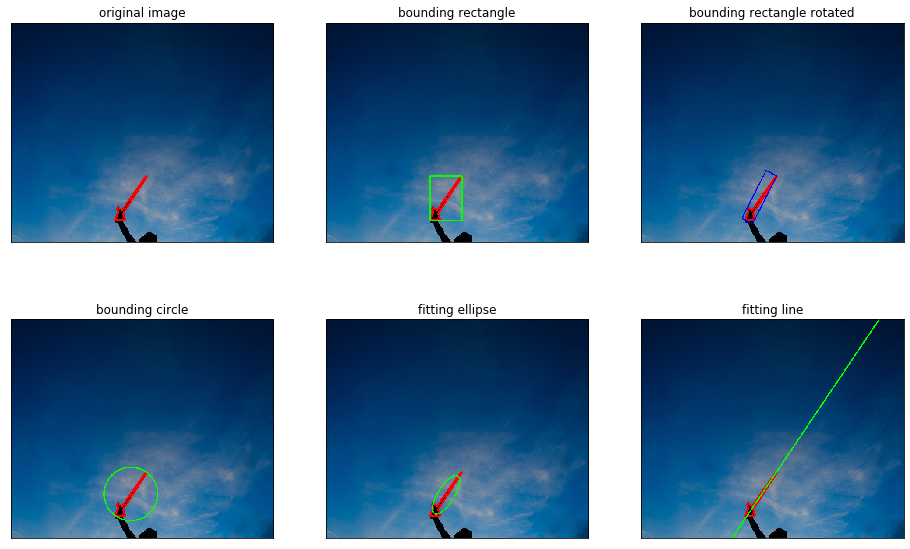

In [48]:
# original image with contour
plt.subplot(231)
plt.imshow(img_contours)
plt.title('original image'), plt.xticks([]), plt.yticks([])

# Bounding rectangle
x,y,w,h = cv2.boundingRect(contour)
img_rectangle = img_contours.copy()
cv2.rectangle(img_rectangle,(x,y),(x+w,y+h),(0,255,0),2)

plt.subplot(232)
plt.imshow(img_rectangle)
plt.title('bounding rectangle'), plt.xticks([]), plt.yticks([])


# Bounding rotated rectangle
rect = cv2.minAreaRect(contour)
box = cv2.boxPoints(rect)
box = np.int0(box)
img_rectangle_rot = img_contours.copy()
cv2.drawContours(img_rectangle_rot,[box],0,(0,0,255),2)

plt.subplot(233)
plt.imshow(img_rectangle_rot)
plt.title('bounding rectangle rotated'), plt.xticks([]), plt.yticks([])


# Bounding circle
(x,y),radius = cv2.minEnclosingCircle(contour)
center = (int(x),int(y))
radius = int(radius)
img_circle = img_contours.copy()
cv2.circle(img_circle,center,radius,(0,255,0),2)

plt.subplot(234)
plt.imshow(img_circle)
plt.title('bounding circle'), plt.xticks([]), plt.yticks([])


# Fitting ellipse
ellipse = cv2.fitEllipse(contour)
img_ellipse = img_contours.copy()
cv2.ellipse(img_ellipse,ellipse,(0,255,0),2)

plt.subplot(235)
plt.imshow(img_ellipse)
plt.title('fitting ellipse'), plt.xticks([]), plt.yticks([])

# Fitting line
img_line = img_contours.copy()
rows,cols = img_line.shape[:2]
[vx,vy,x,y] = cv2.fitLine(contour, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(img_line,(cols-1,righty),(0,lefty),(0,255,0),2)

plt.subplot(236)
plt.imshow(img_line)
plt.title('fitting line'), plt.xticks([]), plt.yticks([])

plt.show()

## Contour chain approximation

- CHAIN_APPROX_NONE - stores absolutely all contour points;
- CHAIN_APPROX_SIMPLE - compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.

Number of contour points without approximation: 196
Number of contour points with simple approximation: 4


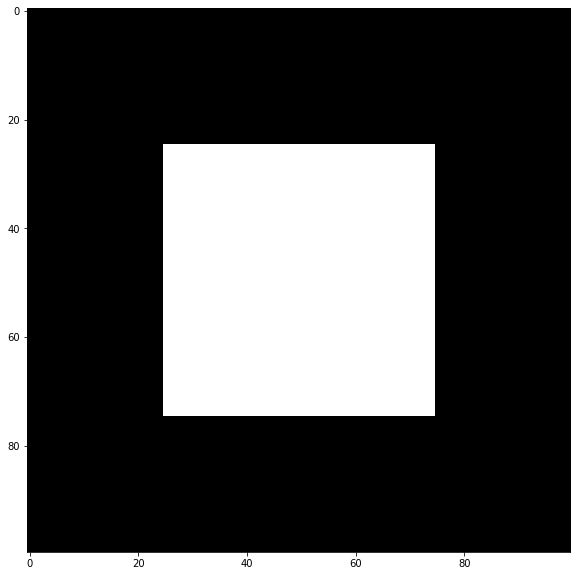

In [49]:
canvas = np.zeros([100, 100],np.uint8)
canvas[25:75,25:75] = 255

plt.imshow(canvas, cmap='gray')

contours1, hierarchy1 = cv2.findContours(canvas, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(canvas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img1 = canvas.copy()
img2 = canvas.copy()
print('Number of contour points without approximation: {}'.format(contours1[0].shape[0]))
print('Number of contour points with simple approximation: {}'.format(contours2[0].shape[0]))

## References
1. Histograms tutorial [link](https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html)

2. Thresholding tutorial: [link](https://docs.opencv.org/3.1.0/d7/d4d/tutorial_py_thresholding.html)  
3. Basic thresholding operations: [link](https://docs.opencv.org/2.4/doc/tutorials/imgproc/threshold/threshold.html)  
4. Otsu's thresholding explanation: [link](http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html)  
5. Otsu's method wikipedia: [link](https://en.wikipedia.org/wiki/Otsu%27s_method)
6. Morphological operations: [link](http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm)  
7. Morphological operations in OpenCV: [link](https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html)
8. Gradients in OpenCV: [link](https://docs.opencv.org/3.4/d5/d0f/tutorial_py_gradients.html)
9. Canny edge detector in OpenCV: [link](https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html)
10. How to find contours in OpenCV: [link](https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html)  
11. Contour features: [link](https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html)